In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
adata=sc.read_csv('goolam_imp_t.csv', delimiter=',', first_column_names=None, dtype='float32')

In [2]:
adata

AnnData object with n_obs × n_vars = 124 × 10057

In [3]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

sc.pp.normalize_total(adata, target_sum=1e4)

sc.pp.log1p(adata)

sc.pp.scale(adata, max_value=10)

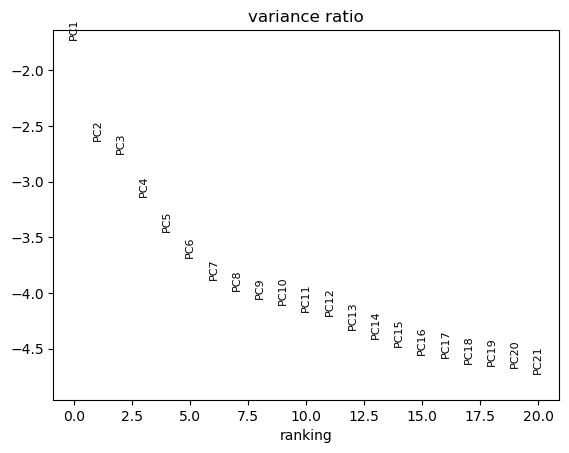

In [4]:
sc.tl.pca(adata, svd_solver='arpack')
sc.pl.pca_variance_ratio(adata,n_pcs=20,log=True)

/home/zaman/anaconda3/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


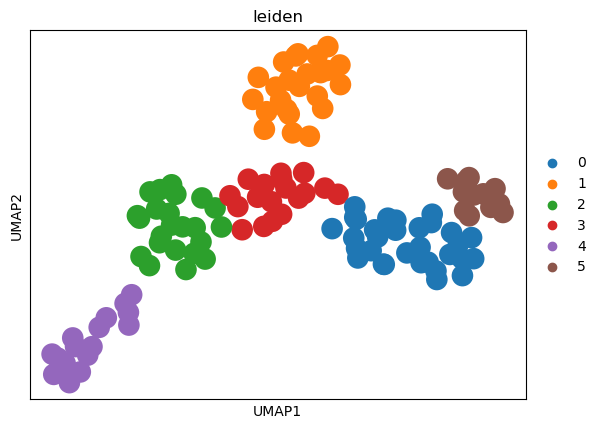

In [5]:
#create neighborhood graph using 20 pcs 
sc.pp.neighbors(adata, n_neighbors=15, n_pcs=30)
##dim reduction using umap
sc.tl.umap(adata)
#Leiden clustering
import leidenalg
sc.tl.leiden(adata)
##visualizing clusters
sc.pl.umap(adata, color=['leiden'])

In [6]:
pd.DataFrame(adata.obs).to_csv("goolam_leiden.csv")

/home/zaman/anaconda3/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:422: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/home/zaman/anaconda3/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:422: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/home/zaman/anaconda3/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:422: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/home/zaman/anaconda3/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:422: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/home/zaman/anaconda3/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:422: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/home/zaman/anaconda3/lib

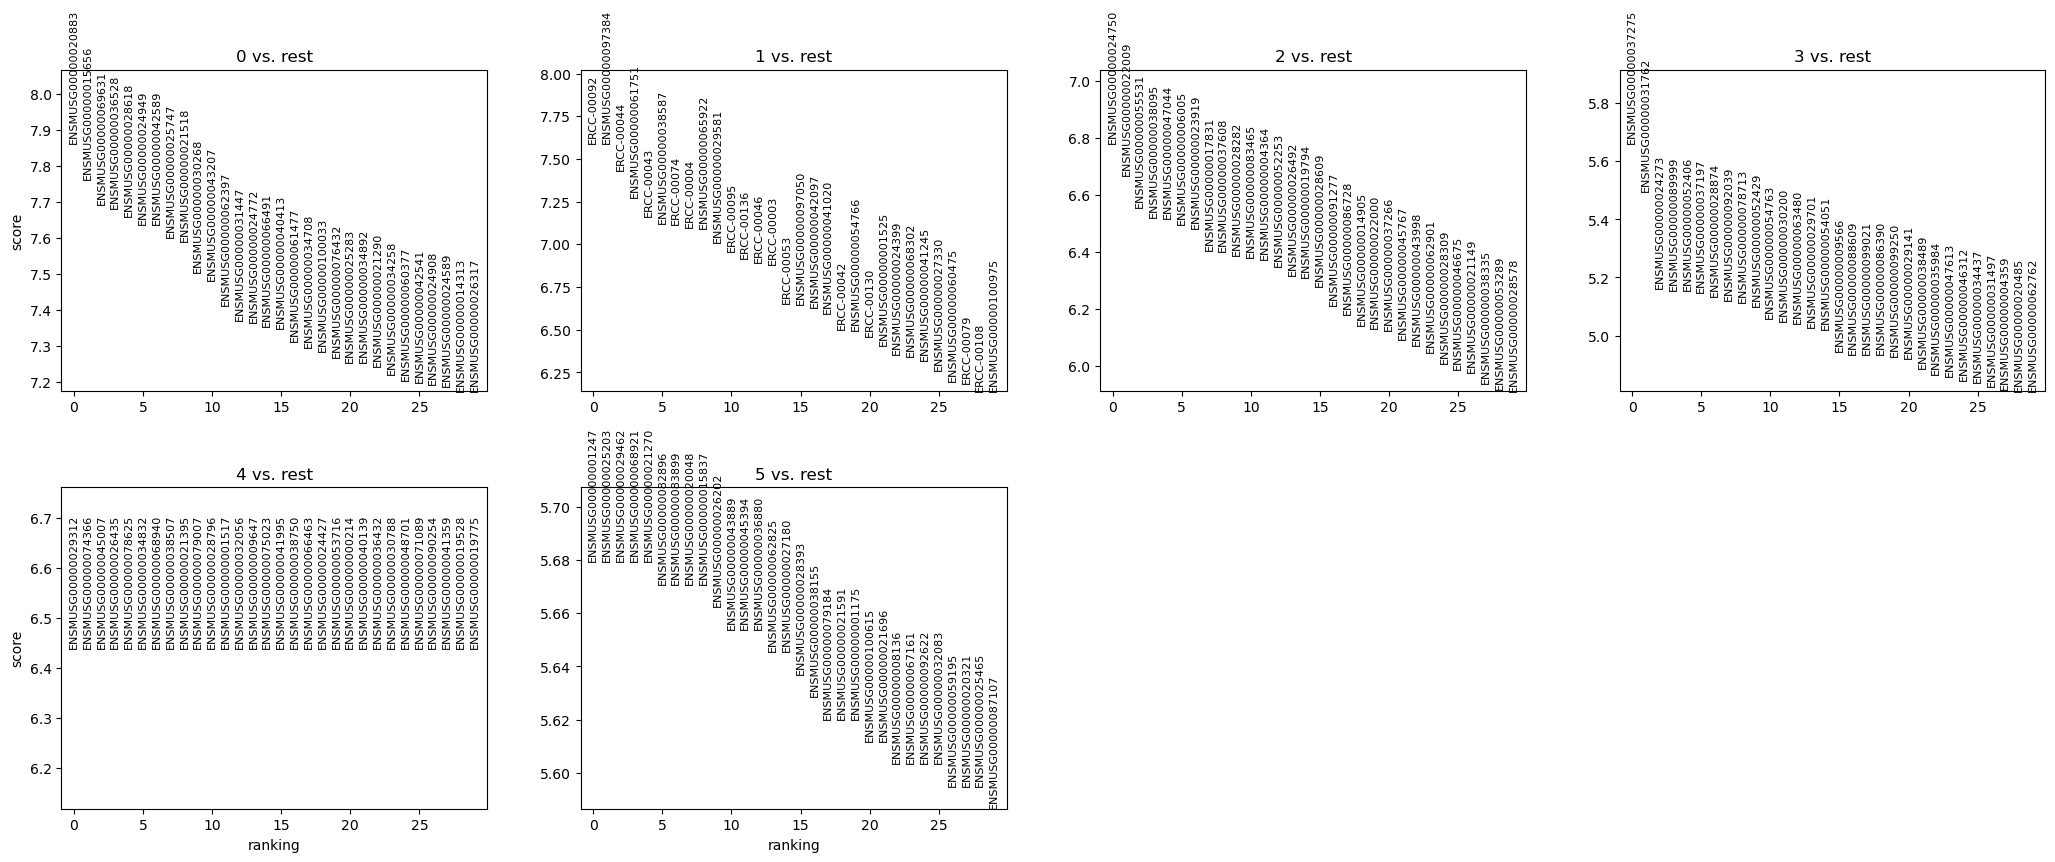

In [7]:
sc.tl.rank_genes_groups(adata, 'leiden', method='wilcoxon',key_added = "wilcoxon")
sc.pl.rank_genes_groups(adata, n_genes=30, sharey=False,key="wilcoxon")

In [8]:
#save top 10 DE genes for each cluster using wilcox-ranksum test
result = adata.uns['wilcoxon']
groups = result['names'].dtype.names
p=pd.DataFrame(
    {group + '_' + key[:1]: result[key][group]
    for group in groups for key in ['names', 'pvals']}).head(10)
pd.DataFrame(p).to_csv("goolam_marker.csv")

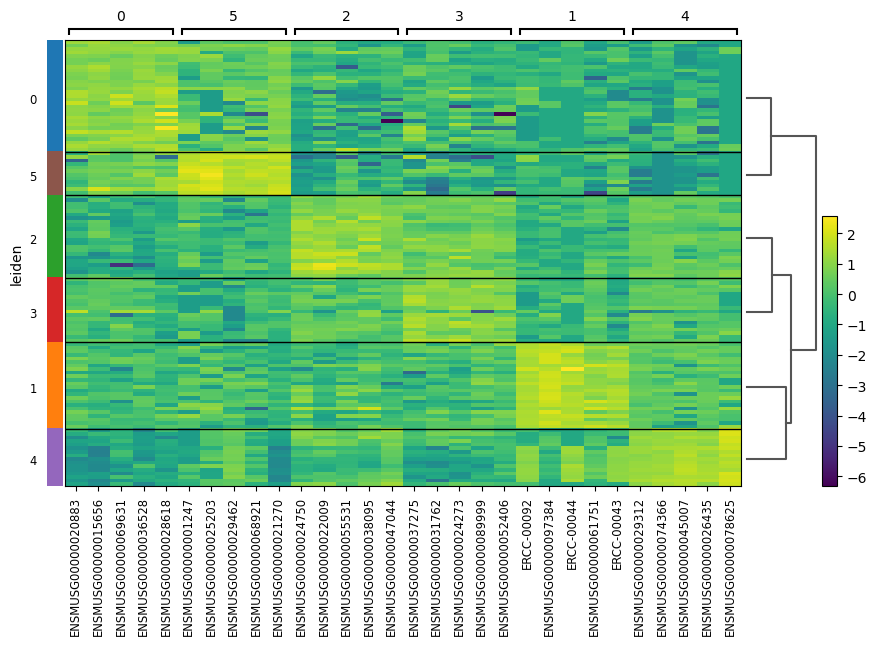

In [9]:
sc.pl.rank_genes_groups_heatmap(adata, n_genes=5, key="wilcoxon", groupby="leiden", show_gene_labels=True)

/home/zaman/anaconda3/lib/python3.11/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


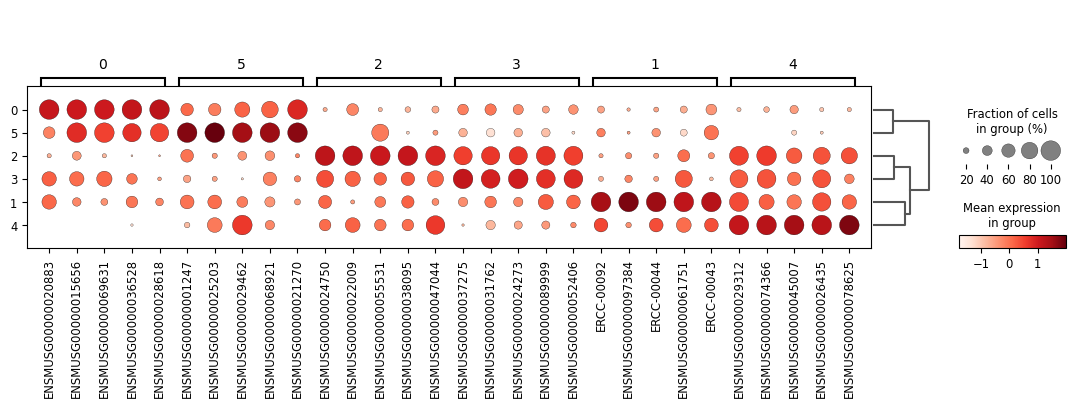

In [10]:
sc.pl.rank_genes_groups_dotplot(adata, n_genes=5, key="wilcoxon", groupby="leiden")

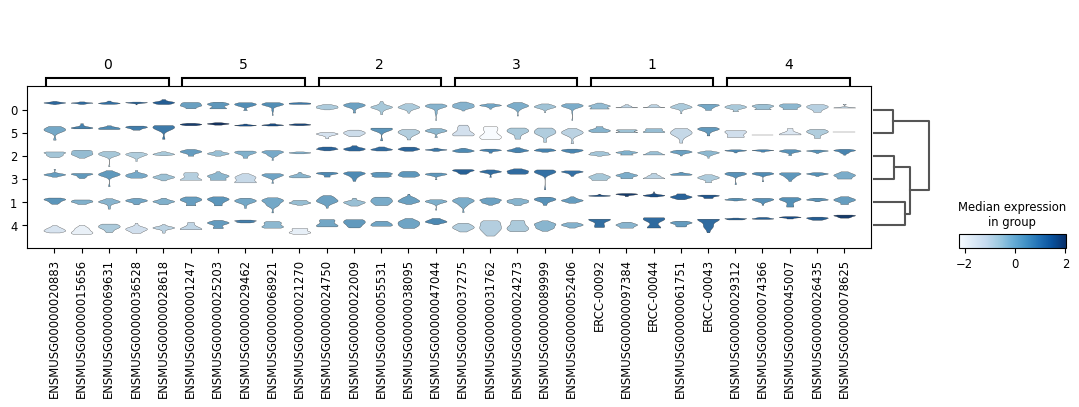

In [11]:
sc.pl.rank_genes_groups_stacked_violin(adata, n_genes=5, key="wilcoxon", groupby="leiden")

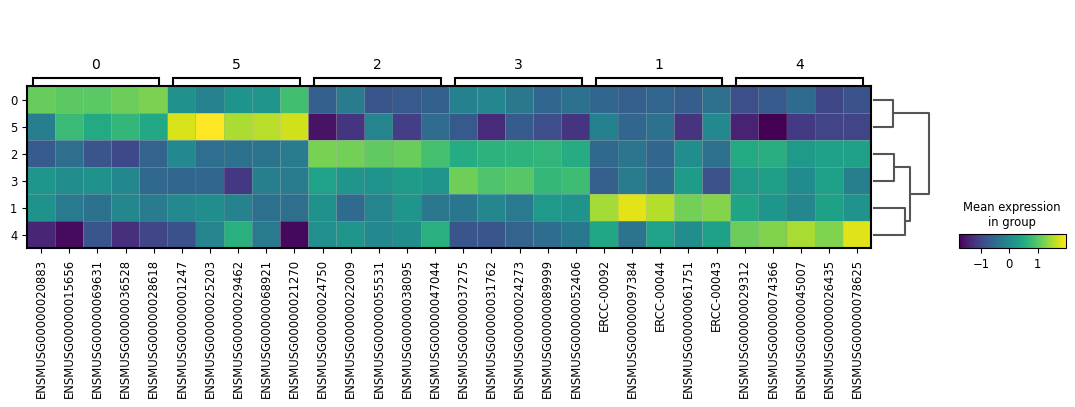

In [12]:
sc.pl.rank_genes_groups_matrixplot(adata, n_genes=5, key="wilcoxon", groupby="leiden")

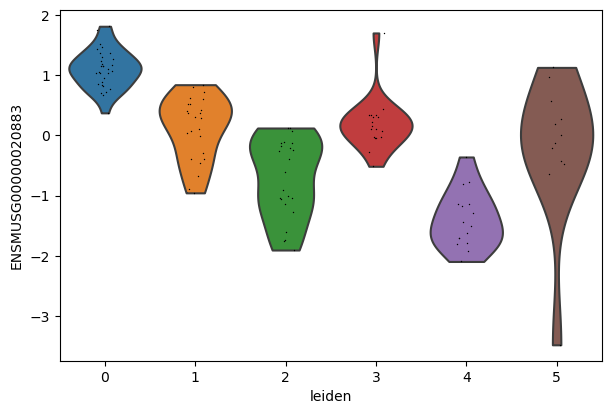

In [13]:
sc.pl.violin(adata, ['ENSMUSG00000020883'], groupby='leiden')

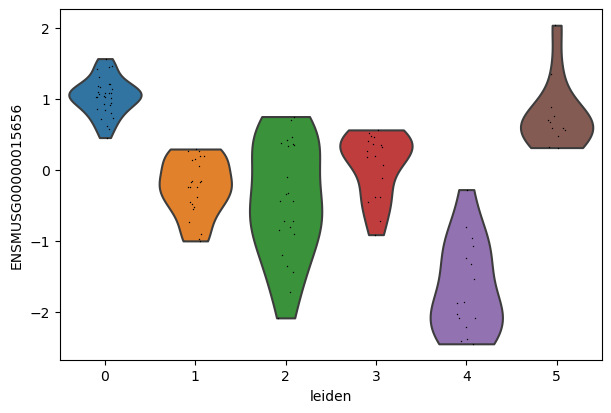

In [15]:
sc.pl.violin(adata, ['ENSMUSG00000015656'], groupby='leiden')

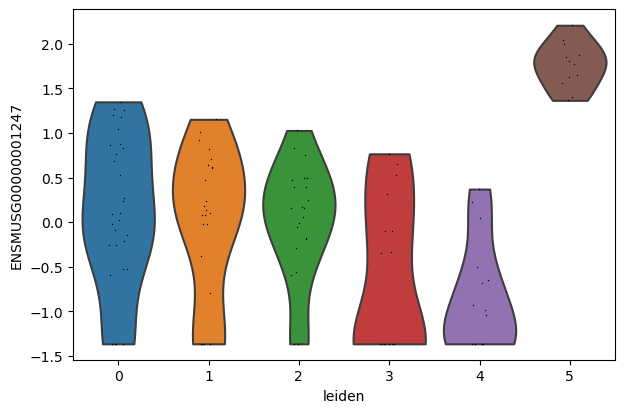

In [16]:
sc.pl.violin(adata, ['ENSMUSG00000001247'], groupby='leiden')

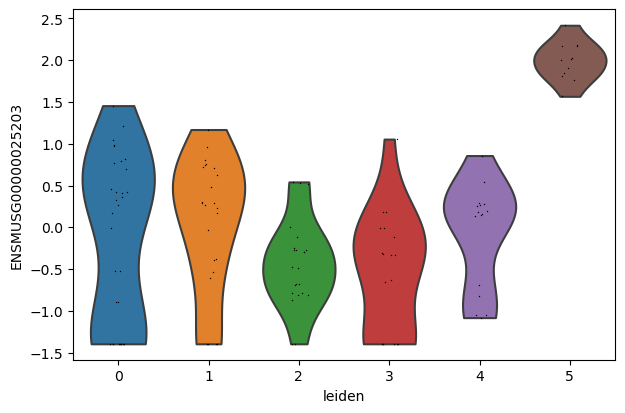

In [17]:
sc.pl.violin(adata, ['ENSMUSG00000025203'], groupby='leiden')

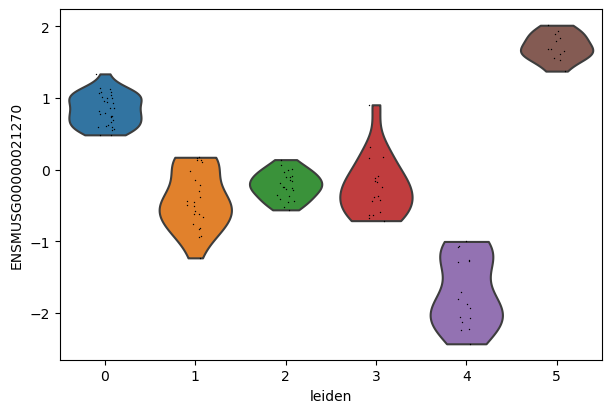

In [18]:
sc.pl.violin(adata, ['ENSMUSG00000021270'], groupby='leiden')

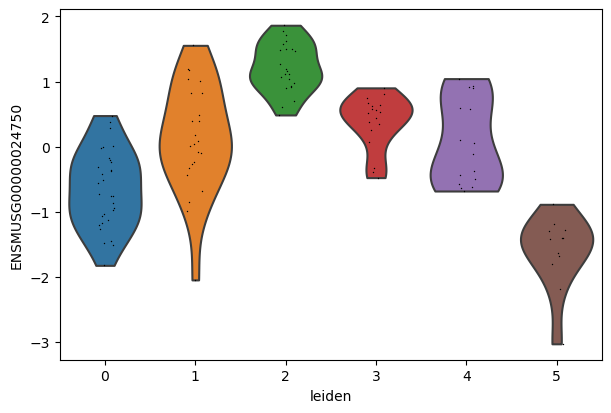

In [20]:
sc.pl.violin(adata, ['ENSMUSG00000024750'], groupby='leiden')